In [38]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [39]:
# SETTINGS
height = 16 # set image height
width = 16 # set image width
n = 100  # set number of (height x width) images to create

data = []
for _ in range(n):
    random_data = np.random.random((height,width))
    random_data[random_data < 0.5] = 0
    random_data[random_data >= 0.5] = 1
    data.append(random_data)

In [40]:
import matplotlib.cm as cm
from pathlib import Path
from os import mkdir

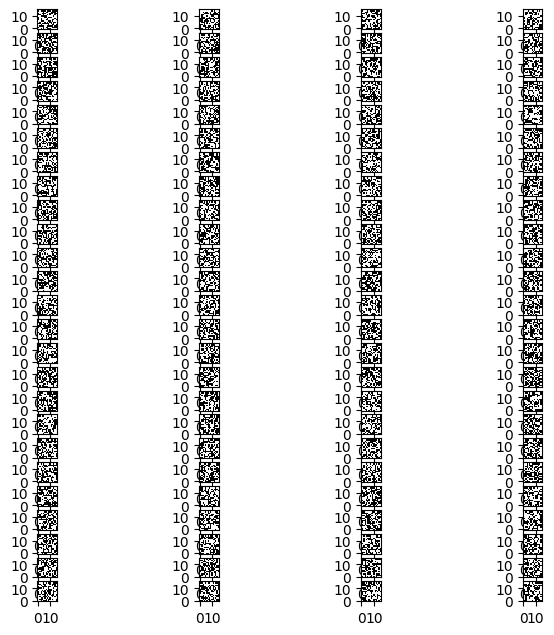

In [41]:
from os import rmdir

folder = Path(f"random/{height}x{width}")
if not folder.parent.exists():
    mkdir(folder.parent)
if not folder.exists():
    mkdir(folder)


def show_images(images, color_map):
    plt.figure(figsize=(8, 8))
    columns = 4
    for i, image in enumerate(images):
        plt.subplot(int(len(data)/columns)+1, columns, i+1)
        plt.imshow(image,interpolation='none',cmap=color_map,origin='lower')
    plt.show()

def save_images(images, path):
    for i, image in enumerate(images):
        file_path = path.joinpath(f"img{i}.png")
        plt.imsave(file_path.absolute(), image,cmap=cmap,origin='lower')

cmap = cm.gray

save_images(data, folder)
show_images(data, cmap)

In [42]:
from os import listdir


def flatten_read_image(input_image):
    """

    :param input_image: black and white image imported with plt.imread() function
    :return: array of 0's and 1's describing imported image
    """
    prepared_image = []

    for element in input_image:
        element_flatten = []
        for row in element:
            element_flatten.append(row[0])
        prepared_image.append(element_flatten)

    prepared_image.reverse()
    return prepared_image

def import_images(path):
    imported_images = []

    for file in listdir(path):
        img = plt.imread(folder.joinpath(file))
        flatten_image = flatten_read_image(img)
        imported_images.append(flatten_image)

    return imported_images

import_imgs = import_images(folder)


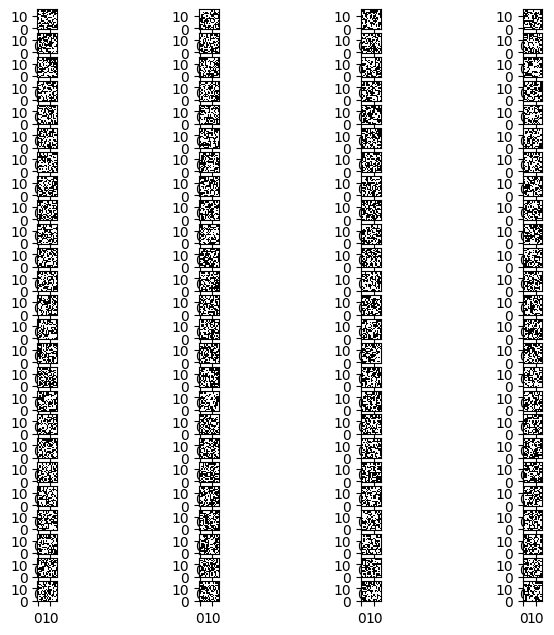

In [43]:
show_images(import_imgs, cmap)